In [2]:
import pandas as pd
df = pd.read_csv("95012IncludingCVEs_20230326.csv")
df.head()

,created_at,id,text,author_id,edit_history_tweet_ids,public_metrics,CVE
0,2023-02-06T15:00:04.000Z,1622611085894328322,Docker Full Privilege Escalation (#CVE-2022-25...,4.365682e+08,['1622611085894328322'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2022-25365
1,2023-02-06T15:00:35.000Z,1622611217725399042,RT @0xor0ne: CVE-2021-27365: analysis and expl...,1.949128e+07,['1622611217725399042'],"{'retweet_count': 107, 'reply_count': 0, 'like...",CVE-2021-27365
2,2023-02-06T15:01:32.000Z,1622611455823732736,CVE-2021-21974 https://t.co/OqV4Ki8gRI #Harsia...,1.083501e+18,['1622611455823732736'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2021-21974
3,2023-02-06T15:02:17.000Z,1622611643040423939,RT @SecurityBDog: Is CVE-2022-42889 important ...,1.359569e+18,['1622611643040423939'],"{'retweet_count': 2, 'reply_count': 0, 'like_c...",CVE-2022-42889
4,2023-02-06T15:02:32.000Z,1622611709390389248,CVE-2017-2997 https://t.co/lC3cUVrBN9 #HarsiaInfo,1.083501e+18,['1622611709390389248'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2017-2997


In [3]:
df_CVEs = df[["author_id","CVE"]].groupby(["CVE"])["author_id"]\
                                          .nunique()\
                                          .reset_index(name = 'num_of_author')\
                                          .sort_values(['num_of_author'],ascending = False)
df_CVEs.head()

,CVE,num_of_author
9508,CVE-2023-23397,3202
6285,CVE-2022-39952,1160
9024,CVE-2023-21716,883
9039,CVE-2023-21768,647
9653,CVE-2023-23752,612


In [4]:
len(df)

95012

In [5]:
len(df_CVEs)

11044

In [6]:
df_CVEs_10p = df_CVEs[df_CVEs["num_of_author"] >= 10]
len(df_CVEs_10p)

1724

In [7]:
df_CVEs_10m = df_CVEs[df_CVEs["num_of_author"] < 10]
len(df_CVEs_10m)

9320

In [8]:
df_nan = pd.read_csv("43592_NaN_data_with_9367_uniqueCVEs_20230326.csv", index_col = 0)

In [9]:
df_nan.head()

,created_at,id,text,author_id,edit_history_tweet_ids,public_metrics,CVE,baseSeverity,baseScore
0,2023-02-06T15:00:04.000Z,1622611085894328322,Docker Full Privilege Escalation (#CVE-2022-25...,4.365682e+08,['1622611085894328322'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2022-25365,NaN,NaN
4,2023-02-06T15:02:32.000Z,1622611709390389248,CVE-2017-2997 https://t.co/lC3cUVrBN9 #HarsiaInfo,1.083501e+18,['1622611709390389248'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2017-2997,NaN,NaN
23,2023-02-06T15:10:47.000Z,1622613783393837058,RT @WolfgangSesin: New post from https://t.co/...,1.535647e+18,['1622613783393837058'],"{'retweet_count': 1, 'reply_count': 0, 'like_c...",CVE-2018-10000,NaN,NaN
25,2023-02-06T15:12:42.000Z,1622614264505679873,安卓应用漏洞学习case8–CVE-2020-6828\nhttps://t.co/abPp...,3.258978e+09,['1622614264505679873'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2020-6828,NaN,NaN
26,2023-02-06T15:13:15.000Z,1622614405333635077,RT @www_sesin_at: New post from https://t.co/9...,1.535647e+18,['1622614405333635077'],"{'retweet_count': 1, 'reply_count': 0, 'like_c...",CVE-2018-10000,NaN,NaN


In [10]:
# 全Tweetから10人未満ツイートのCVE：9320に該当するTweet数を数える
df_tweets_10m = df_nan[df_nan["CVE"].isin(df_CVEs_10m["CVE"])]
df_tweets_10m.head()

,created_at,id,text,author_id,edit_history_tweet_ids,public_metrics,CVE,baseSeverity,baseScore
0,2023-02-06T15:00:04.000Z,1622611085894328322,Docker Full Privilege Escalation (#CVE-2022-25...,4.365682e+08,['1622611085894328322'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2022-25365,NaN,NaN
4,2023-02-06T15:02:32.000Z,1622611709390389248,CVE-2017-2997 https://t.co/lC3cUVrBN9 #HarsiaInfo,1.083501e+18,['1622611709390389248'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2017-2997,NaN,NaN
23,2023-02-06T15:10:47.000Z,1622613783393837058,RT @WolfgangSesin: New post from https://t.co/...,1.535647e+18,['1622613783393837058'],"{'retweet_count': 1, 'reply_count': 0, 'like_c...",CVE-2018-10000,NaN,NaN
25,2023-02-06T15:12:42.000Z,1622614264505679873,安卓应用漏洞学习case8–CVE-2020-6828\nhttps://t.co/abPp...,3.258978e+09,['1622614264505679873'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2020-6828,NaN,NaN
26,2023-02-06T15:13:15.000Z,1622614405333635077,RT @www_sesin_at: New post from https://t.co/9...,1.535647e+18,['1622614405333635077'],"{'retweet_count': 1, 'reply_count': 0, 'like_c...",CVE-2018-10000,NaN,NaN


In [11]:
len(df_tweets_10m)

42127

In [12]:
df_tweets_10p = df[df["CVE"].isin(df_CVEs_10p["CVE"])]
df_tweets_10p.head()

,created_at,id,text,author_id,edit_history_tweet_ids,public_metrics,CVE
1,2023-02-06T15:00:35.000Z,1622611217725399042,RT @0xor0ne: CVE-2021-27365: analysis and expl...,1.949128e+07,['1622611217725399042'],"{'retweet_count': 107, 'reply_count': 0, 'like...",CVE-2021-27365
2,2023-02-06T15:01:32.000Z,1622611455823732736,CVE-2021-21974 https://t.co/OqV4Ki8gRI #Harsia...,1.083501e+18,['1622611455823732736'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2021-21974
3,2023-02-06T15:02:17.000Z,1622611643040423939,RT @SecurityBDog: Is CVE-2022-42889 important ...,1.359569e+18,['1622611643040423939'],"{'retweet_count': 2, 'reply_count': 0, 'like_c...",CVE-2022-42889
5,2023-02-06T15:02:36.000Z,1622611724770877443,RT @0xor0ne: CVE-2022-47949: analysis and expl...,1.621510e+18,['1622611724770877443'],"{'retweet_count': 71, 'reply_count': 0, 'like_...",CVE-2022-47949
6,2023-02-06T15:03:33.000Z,1622611963275780096,CVE-2022-44268 https://t.co/JWNV88HSaa #Harsia...,1.083501e+18,['1622611963275780096'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2022-44268


In [13]:
len(df_tweets_10p)

52885

In [14]:
# 全Tweetから10人以上ツイートのCVE：1724に該当氏、かつCVSSスコア取得不可Tweet数を数える
df_tweets_10p_nonCVSS = df_nan[df_nan["CVE"].isin(df_CVEs_10p["CVE"])]
df_tweets_10p_nonCVSS.head()

,created_at,id,text,author_id,edit_history_tweet_ids,public_metrics,CVE,baseSeverity,baseScore
204,2023-02-06T16:42:15.000Z,1622636804179460096,RT @Dinosn: CVE-2023-0045 flaw allows hackers ...,1.455643e+18,['1622636804179460096'],"{'retweet_count': 15, 'reply_count': 0, 'like_...",CVE-2023-0045,NaN,NaN
722,2023-02-06T20:53:33.000Z,1622700042426482690,RT @Dinosn: CVE-2023-0045 flaw allows hackers ...,4.898472e+09,['1622700042426482690'],"{'retweet_count': 15, 'reply_count': 0, 'like_...",CVE-2023-0045,NaN,NaN
895,2023-02-06T22:15:42.000Z,1622720718793326597,[ZDI-23-094|CVE-2022-43634] Netatalk dsi_write...,1.518983e+18,['1622720718793326597'],"{'retweet_count': 5, 'reply_count': 0, 'like_c...",CVE-2022-43634,NaN,NaN
960,2023-02-06T23:01:29.000Z,1622732241087643648,CVE-2014-125084 https://t.co/ixuEhHQjVM #Harsi...,1.083501e+18,['1622732241087643648'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2014-12508,NaN,NaN
961,2023-02-06T23:02:30.000Z,1622732494398443520,CVE-2014-125085 https://t.co/rQsRa1XlLG #Harsi...,1.083501e+18,['1622732494398443520'],"{'retweet_count': 0, 'reply_count': 0, 'like_c...",CVE-2014-12508,NaN,NaN


In [15]:
len(df_tweets_10p_nonCVSS)

1465

In [16]:
CVEs_10p_nonCVSS = df_tweets_10p_nonCVSS['CVE'].unique()
CVEs_10p_nonCVSS

array(['CVE-2023-0045', 'CVE-2022-43634', 'CVE-2014-12508',
       'CVE-2021-42792', 'CVE-2021-41064', 'CVE-2022-23529',
       'CVE-2022-22655', 'CVE-2023-24486', 'CVE-2023-2575',
       'CVE-2023-0291', 'CVE-2021-33237', 'CVE-2023-39952',
       'CVE-2017-0985', 'CVE-2017-0984', 'CVE-2017-0983', 'CVE-2017-0989',
       'CVE-2017-0988', 'CVE-2017-0986', 'CVE-2017-0987',
       'CVE-2018-12136', 'CVE-2018-12135', 'CVE-2018-12134',
       'CVE-2021-29410', 'CVE-2023-1103', 'CVE-2023-26463',
       'CVE-2014-12509', 'CVE-2018-3623', 'CVE-2018-3622',
       'CVE-2023-1247', 'CVE-2023-27326', 'CVE-2023-25610',
       'CVE-2021-23185', 'CVE-2021-23199', 'CVE-2023-24749',
       'CVE-2023-2561', 'CVE-2022-37948', 'CVE-2022-37949',
       'CVE-2022-37950', 'CVE-2022-37951', 'CVE-2014-8361',
       'CVE-2023-27537', 'CVE-2023-28426', 'CVE-2022-38217',
       'CVE-2021-3091', 'CVE-2021-3099', 'CVE-2023-28760',
       'CVE-2023-28303'], dtype=object)

In [17]:
len(CVEs_10p_nonCVSS)

47

In [18]:
df_noCVSS = pd.read_csv("noCVSS_with_reasons_20230326.csv", index_col = 0)
len(df_noCVSS)

47

In [19]:
df_noCVSS

,CVE_checked,reason
0,CVE-2023-25610,RESERVED
1,CVE-2023-24749,RESERVED
2,CVE-2023-28760,RESERVED
3,CVE-2023-2561,CVE_ID_NOT_FOUND
4,CVE-2023-28303,RESERVED
6,CVE-2022-22655,RESERVED
7,CVE-2022-23529,NVD score not yet provided.
8,CVE-2023-0045,RESERVED
9,CVE-2023-24486,RESERVED
11,CVE-2014-12509,CVE_ID_NOT_FOUND


In [20]:
df_CVEs_10p.head()

,CVE,num_of_author
9508,CVE-2023-23397,3202
6285,CVE-2022-39952,1160
9024,CVE-2023-21716,883
9039,CVE-2023-21768,647
9653,CVE-2023-23752,612


In [21]:
df_CVEs_top20 = df_CVEs_10p.iloc[:20, :]

In [22]:
df_CVEs_top20

,CVE,num_of_author
9508,CVE-2023-23397,3202
6285,CVE-2022-39952,1160
9024,CVE-2023-21716,883
9039,CVE-2023-21768,647
9653,CVE-2023-23752,612
9583,CVE-2023-23529,525
10775,CVE-2023-27532,490
4437,CVE-2021-21974,385
7986,CVE-2023-0669,337
10142,CVE-2023-25136,317


In [23]:
df_CVEs_top20.reset_index(drop = True)

,CVE,num_of_author
0,CVE-2023-23397,3202
1,CVE-2022-39952,1160
2,CVE-2023-21716,883
3,CVE-2023-21768,647
4,CVE-2023-23752,612
5,CVE-2023-23529,525
6,CVE-2023-27532,490
7,CVE-2021-21974,385
8,CVE-2023-0669,337
9,CVE-2023-25136,317


In [24]:
df_CVEs_top20_idx = df_CVEs_top20.set_index("CVE") 
df_CVEs_top20_idx

,num_of_author
CVE,
CVE-2023-23397,3202
CVE-2022-39952,1160
CVE-2023-21716,883
CVE-2023-21768,647
CVE-2023-23752,612
CVE-2023-23529,525
CVE-2023-27532,490
CVE-2021-21974,385
CVE-2023-0669,337


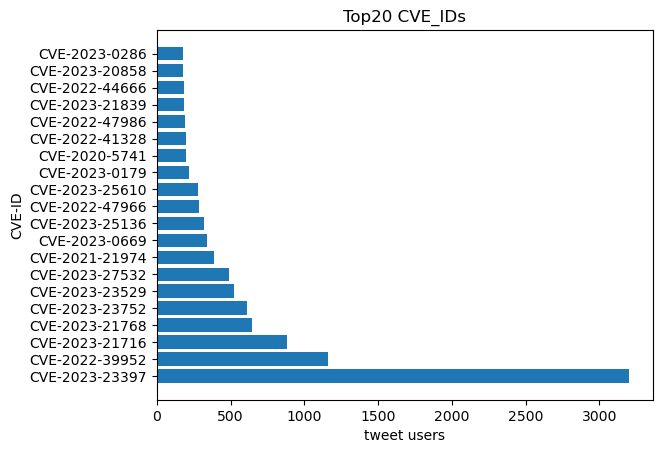

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.set_title("Top20 CVE_IDs")
ax.set_ylabel("CVE-ID")
ax.set_xlabel("tweet users")
ax.barh(y = df_CVEs_top20["CVE"], width = df_CVEs_top20["num_of_author"])
plt.show()

In [26]:
fig.savefig('Top20CVE_IDs.png')